# Analiza zvočnih signalov: Samoglasniki, Žvižg, in Beseda "erozija"

V tej nalogi obravnavamo snemanje, prikazovanje in analizo zvočnih signalov za različne samoglasnike, žvižg ter besedo "erozija". Uporabljeni bodo postopki vizualizacije ter križne korelacije za analizo podobnosti signalov.

In [5]:
from audio_analysis import record_audio, plot_audio_signal, trim_signal, trim_silence, create_vowel_template, find_best_match_segment
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Audio, display
from scipy.io.wavfile import write


## Snemanje zvočnih signalov

Snemamo:
- Samoglasnike "a", "i", "o" pri dveh različnih višinah tona
- Žvižg pri dveh višinah
- Besedo "erozija" pri dveh hitrostih


In [6]:
os.makedirs('plots', exist_ok=True)

duration = 3
sample_rate = 44100

recordings = {}

vowels = ['a', 'i', 'o']

In [16]:

recordings = {}

print("\nRecording vowel 'a' at first pitch...")
recordings['a_1'], _ = record_audio(duration, sample_rate)

print("\nRecording vowel 'a' at second pitch...")
recordings['a_2'], _ = record_audio(duration, sample_rate)


Recording vowel 'a' at first pitch...
Recording for 3 seconds...
Recording finished

Recording vowel 'a' at second pitch...
Recording for 3 seconds...
Recording finished


In [19]:
print("\nRecording vowel 'i' at first pitch...")
recordings['i_1'], _ = record_audio(duration, sample_rate)

print("\nRecording vowel 'i' at second pitch...")
recordings['i_2'], _ = record_audio(duration, sample_rate)


Recording vowel 'i' at first pitch...
Recording for 3 seconds...
Recording finished

Recording vowel 'i' at second pitch...
Recording for 3 seconds...
Recording finished


In [20]:
print("\nRecording vowel 'o' at first pitch...")
recordings['o_1'], _ = record_audio(duration, sample_rate)

print("\nRecording vowel 'o' at second pitch...")
recordings['o_2'], _ = record_audio(duration, sample_rate)


Recording vowel 'o' at first pitch...
Recording for 3 seconds...
Recording finished

Recording vowel 'o' at second pitch...
Recording for 3 seconds...
Recording finished


In [21]:
print("\nRecording whistling at first pitch...")
recordings['whistle_1'], _ = record_audio(duration, sample_rate)

print("\nRecording whistling at second pitch...")
recordings['whistle_2'], _ = record_audio(duration, sample_rate)


Recording whistling at first pitch...
Recording for 3 seconds...
Recording finished

Recording whistling at second pitch...
Recording for 3 seconds...
Recording finished


In [22]:
print("\nRecording word 'erozija' at first speed...")
recordings['erozija_1'], _ = record_audio(duration, sample_rate)

print("\nRecording word 'erozija' at second speed...")
recordings['erozija_2'], _ = record_audio(duration, sample_rate)


Recording word 'erozija' at first speed...
Recording for 3 seconds...
Recording finished

Recording word 'erozija' at second speed...
Recording for 3 seconds...
Recording finished


## Vizualizacija signalov

Prikazani so vsi posneti signali z:
- celotnim signalom
- povečanim odsekom (3–4 periode)


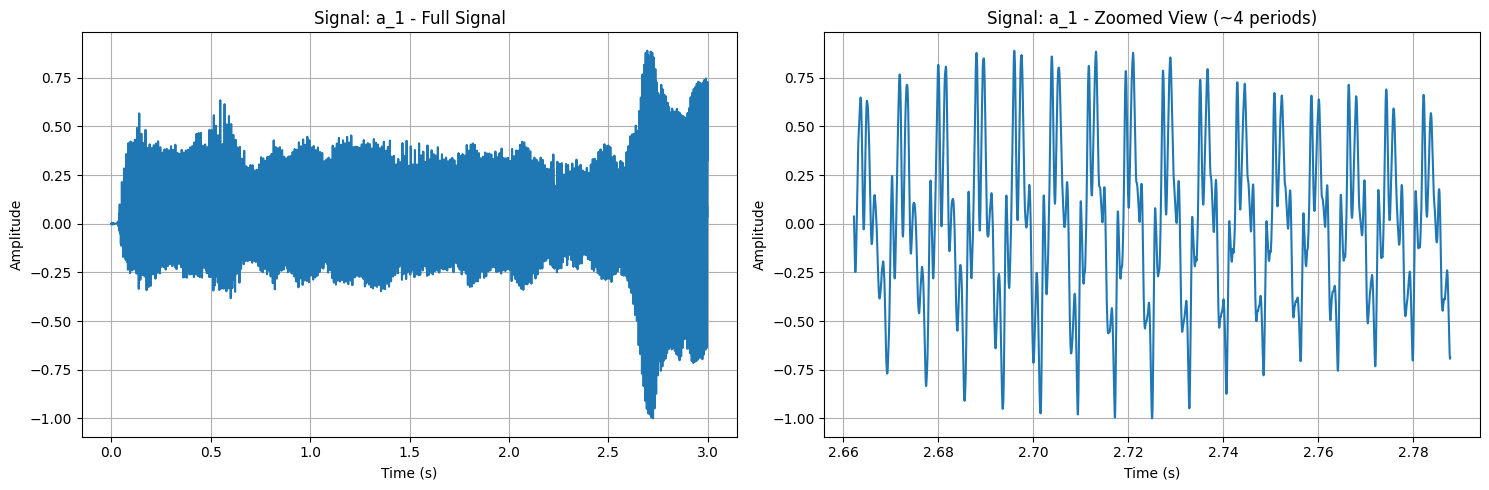

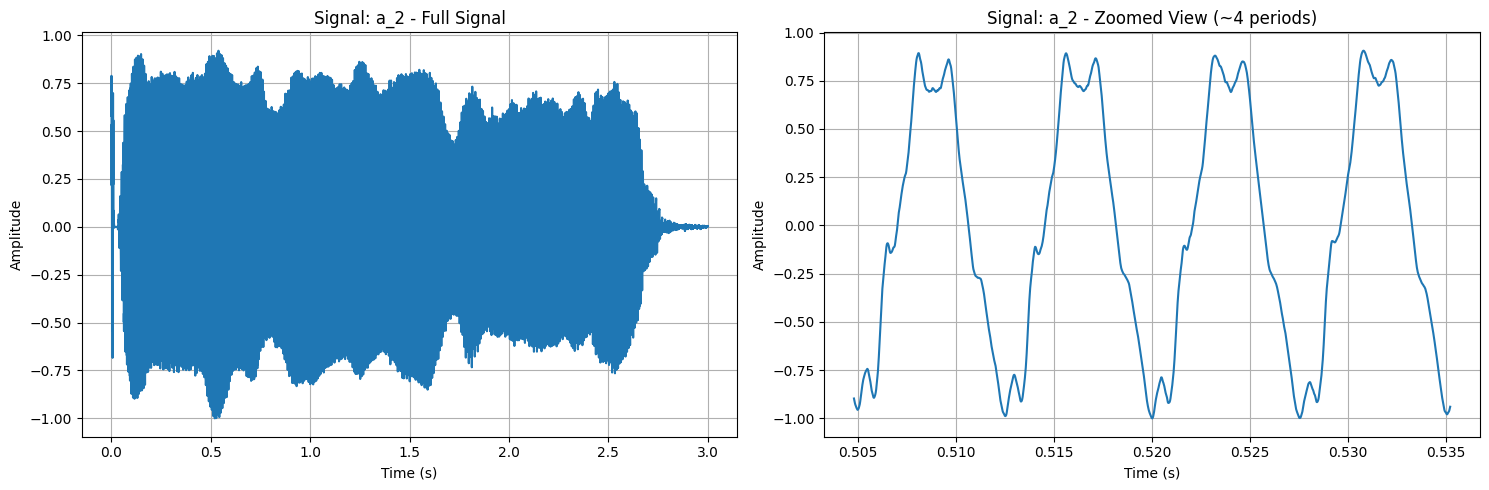

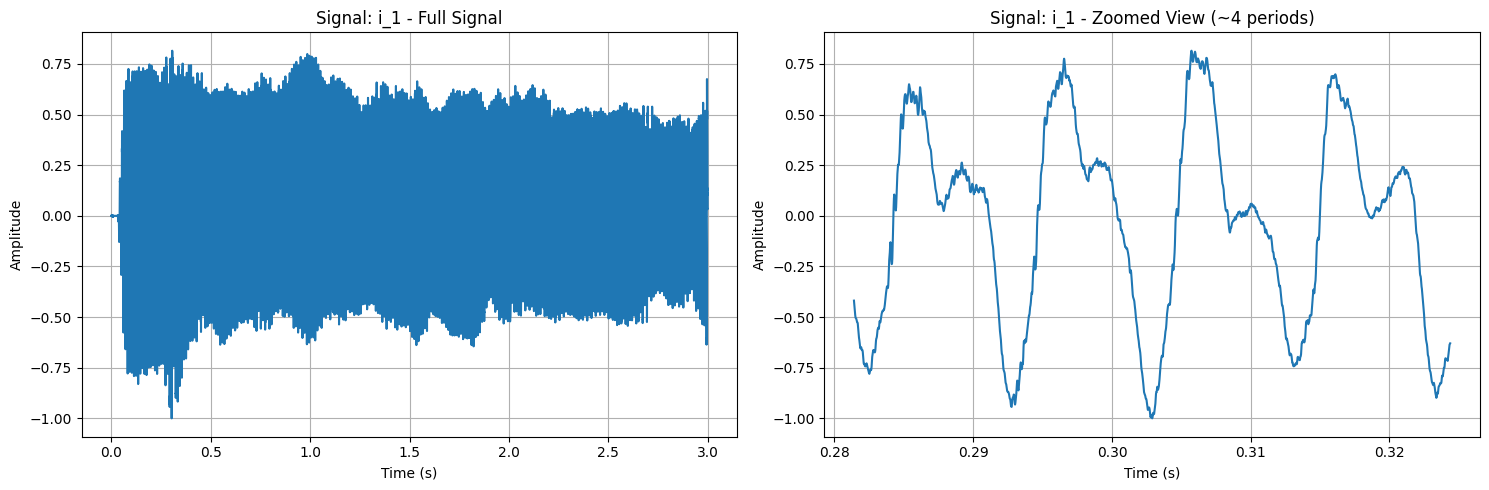

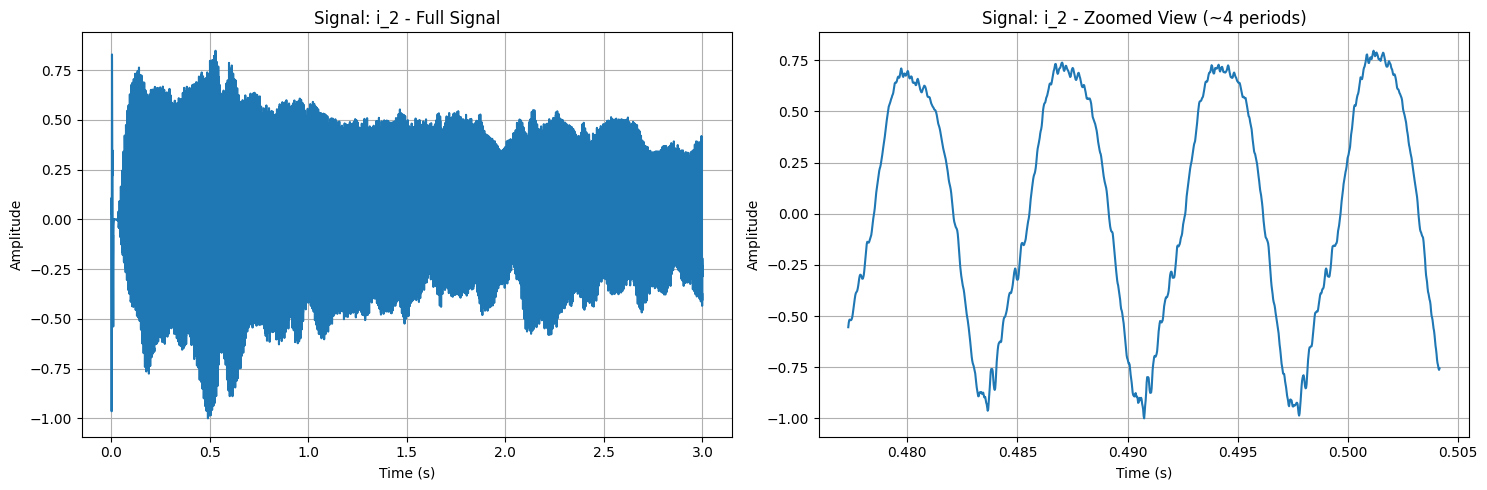

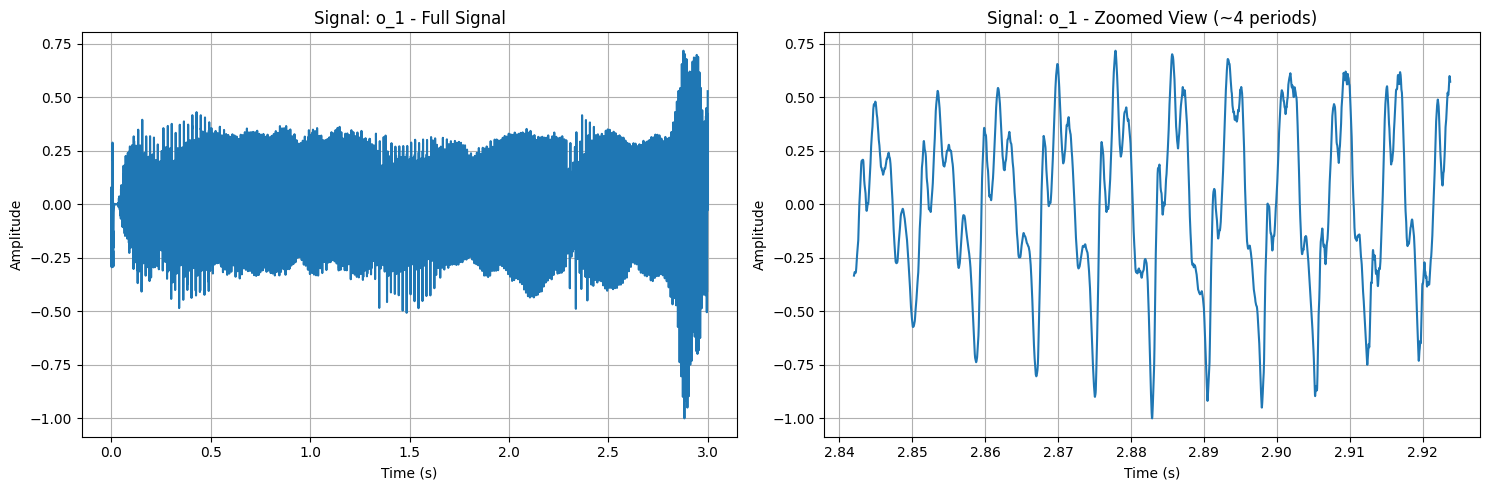

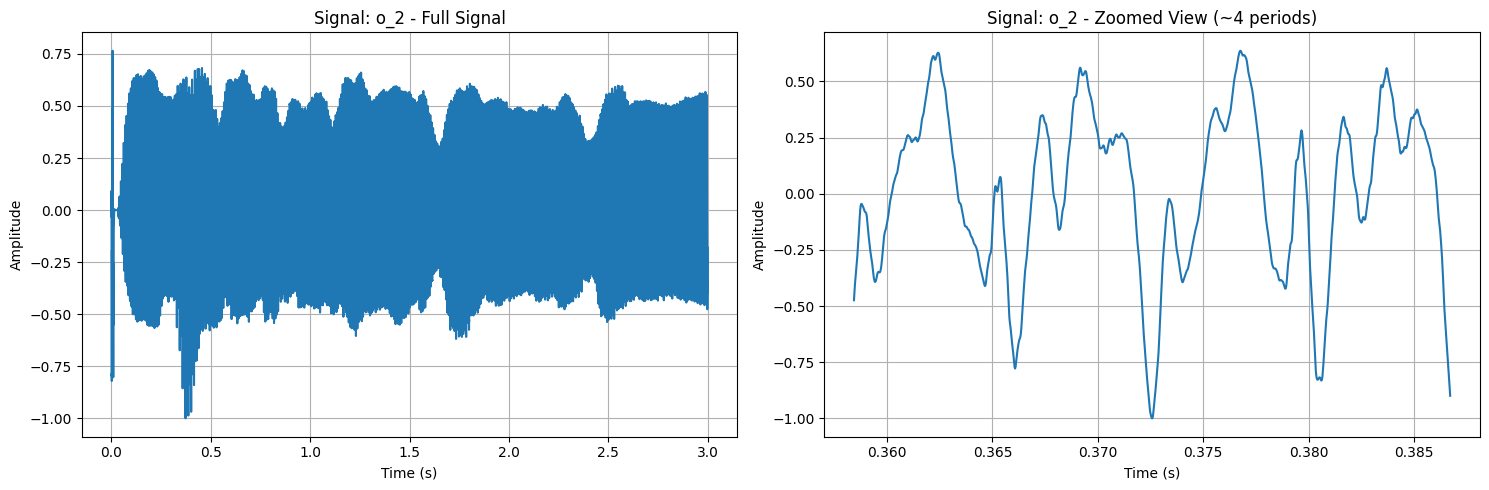

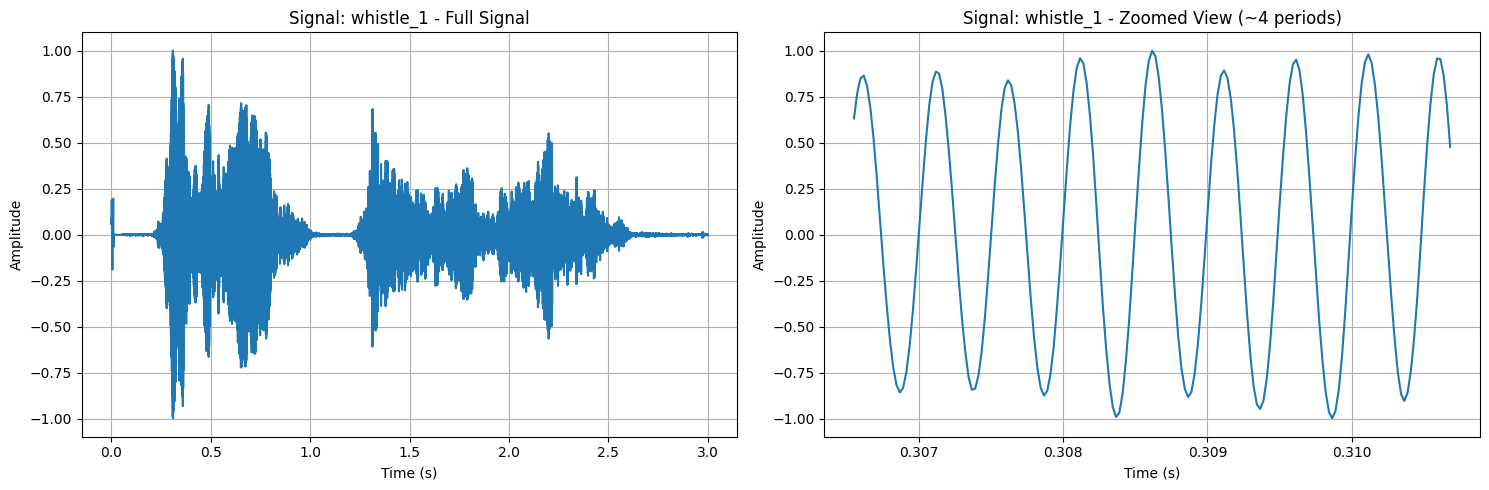

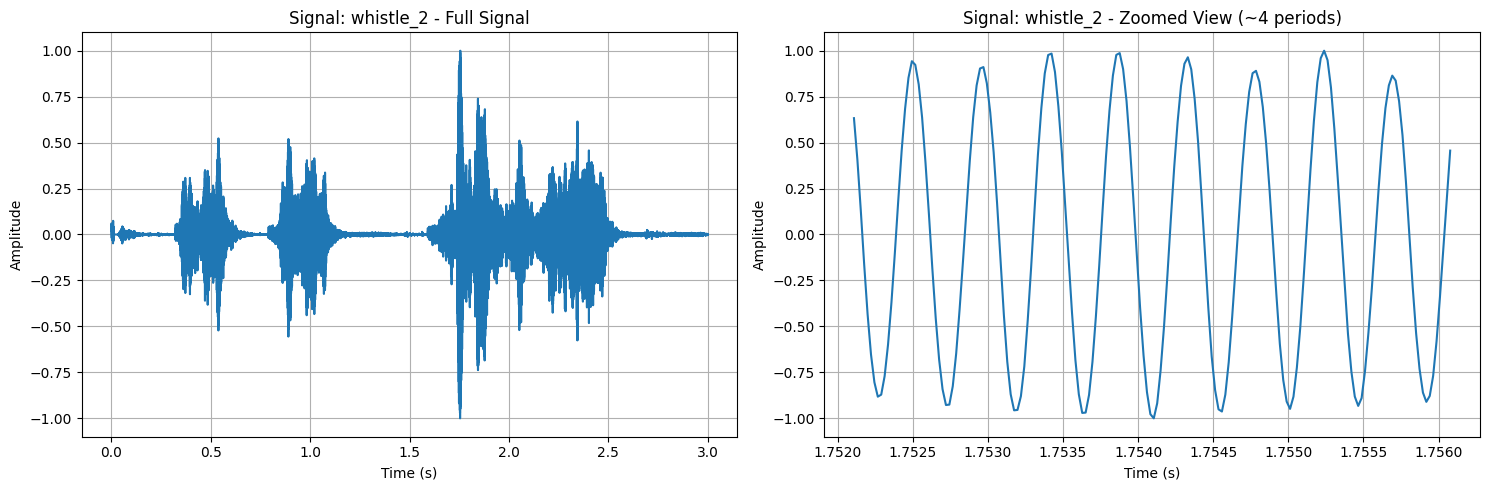

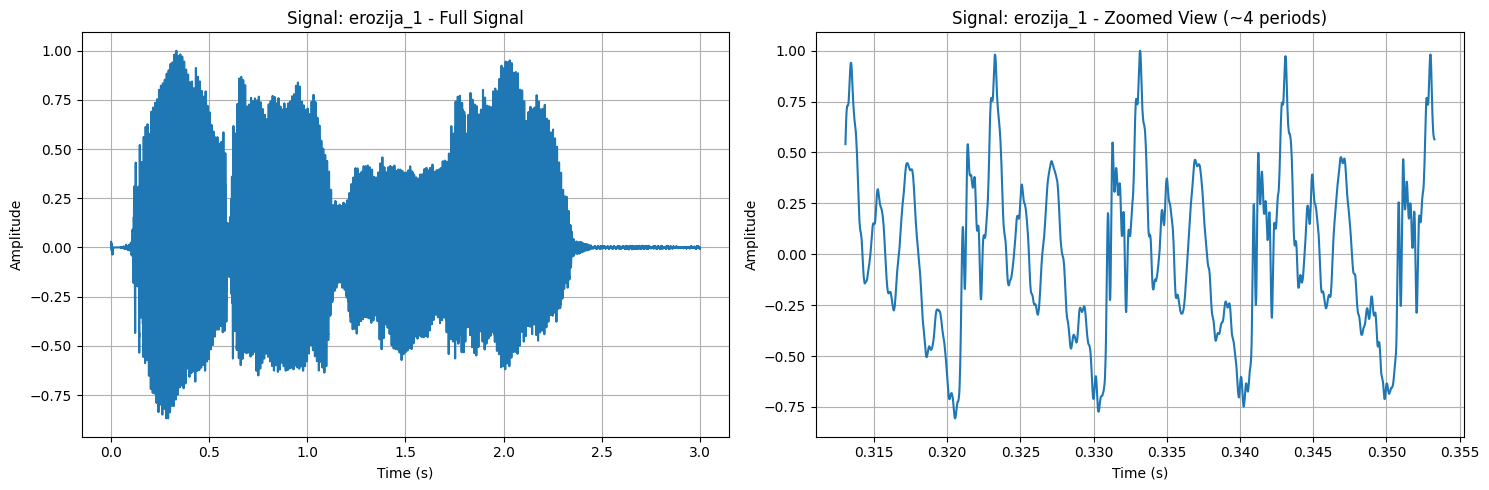

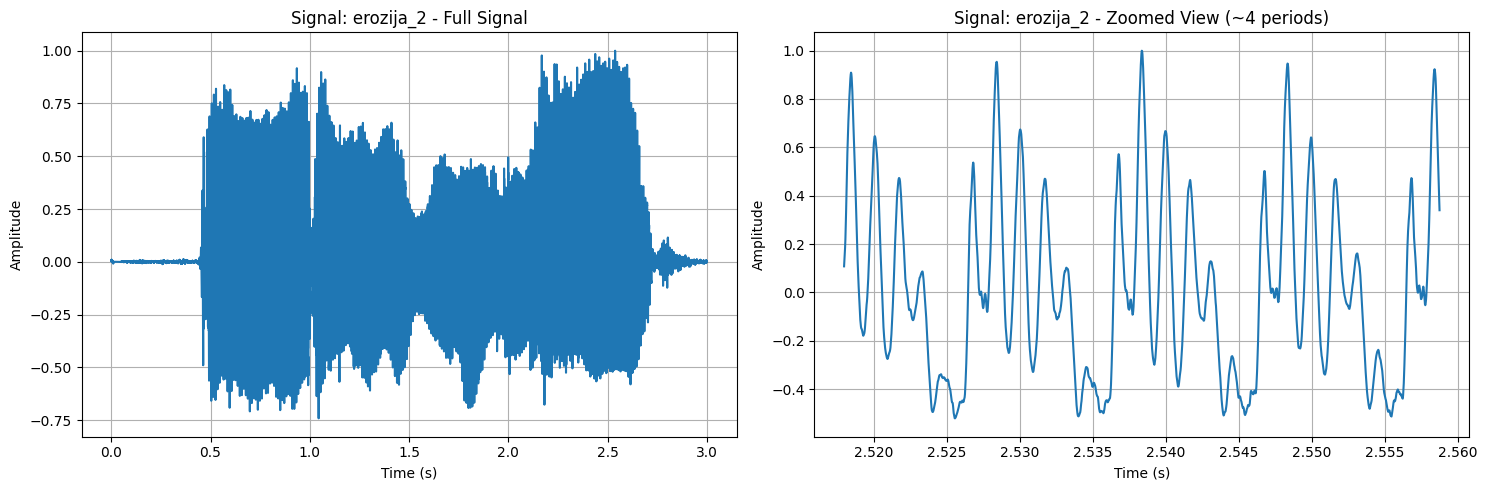

In [23]:
for name, data in recordings.items():
    fig = plot_audio_signal(data, sample_rate, title=f"Signal: {name}")
    plt.show()

## Križna korelacija

Analiza s križno korelacijo za iskanje samoglasnikov v izgovorjavi besede "erozija".


In [481]:
vowel_duration = 0.5
download_count = 0
max_downloads = 3

os.makedirs("downloads", exist_ok=True)

print("Listening to trimmed vowels:")

trimmed_vowels = {}

for vowel in vowels:
    trimmed = trim_signal(recordings[f'{vowel}_1'], sample_rate, vowel_duration)
    trimmed_vowels[f'{vowel}_1'] = trimmed

    print(f"Trimmed vowel '{vowel}':")
    display(Audio(trimmed, rate=sample_rate))

for vowel in vowels:
    trimmed = trim_signal(recordings[f'{vowel}_2'], sample_rate, vowel_duration)
    trimmed_vowels[f'{vowel}_2'] = trimmed

    print(f"Trimmed vowel '{vowel}' 2:")
    display(Audio(trimmed, rate=sample_rate))

    if download_count < max_downloads:
        filename = f"downloads/{vowel}_2_trimmed.wav"
        write(filename, sample_rate, trimmed)
        print(f"Saved: {filename}")
        download_count += 1

# Erozija samples
trimmed_erozija_1 = trim_silence(recordings['erozija_1'], sample_rate=sample_rate)
trimmed_erozija_2 = trim_silence(recordings['erozija_2'], sample_rate=sample_rate)

# Listen to trimmed versions
print("Trimmed 'erozija_1':")
display(Audio(trimmed_erozija_1, rate=sample_rate))

print("Trimmed 'erozija_2':")
display(Audio(trimmed_erozija_2, rate=sample_rate))


Listening to trimmed vowels:
Trimmed vowel 'a':


Trimmed vowel 'i':


Trimmed vowel 'o':


Trimmed vowel 'a' 2:


Saved: downloads/a_2_trimmed.wav
Trimmed vowel 'i' 2:


Saved: downloads/i_2_trimmed.wav
Trimmed vowel 'o' 2:


Saved: downloads/o_2_trimmed.wav
Trimmed 'erozija_1':


Trimmed 'erozija_2':


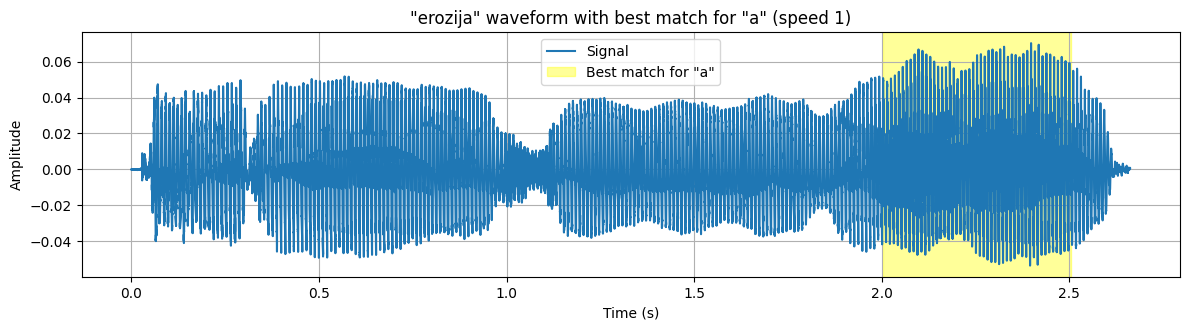

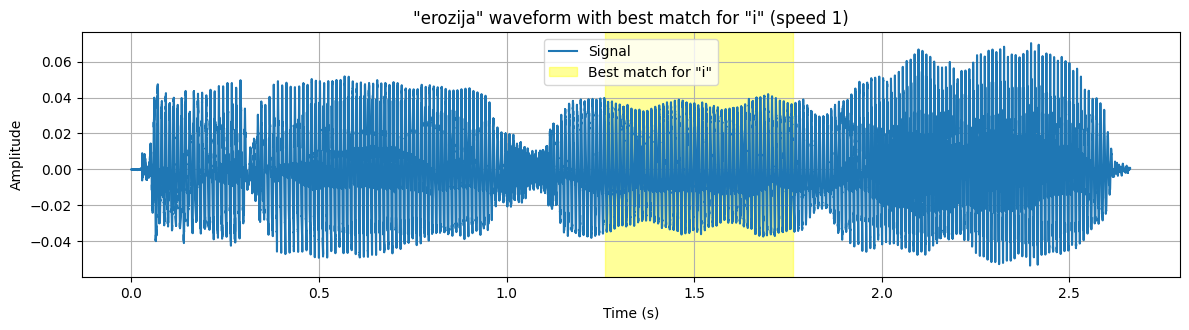

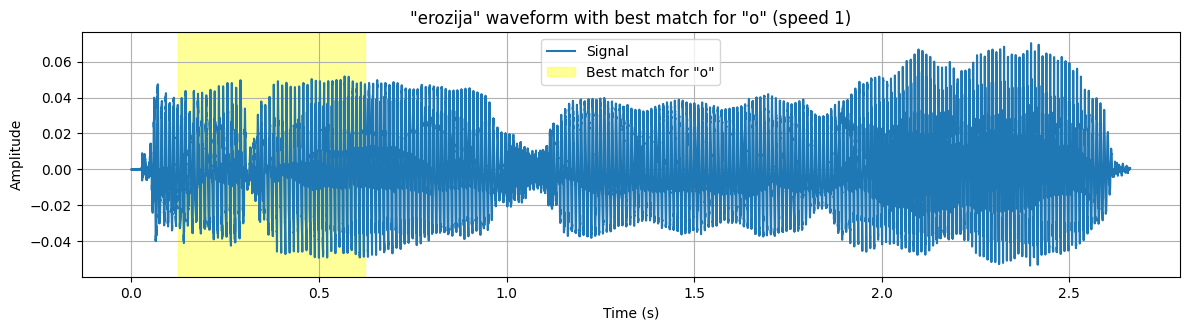

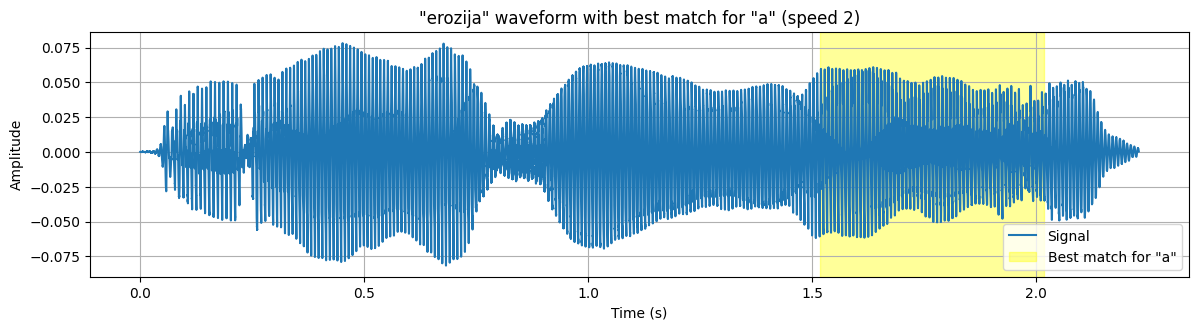

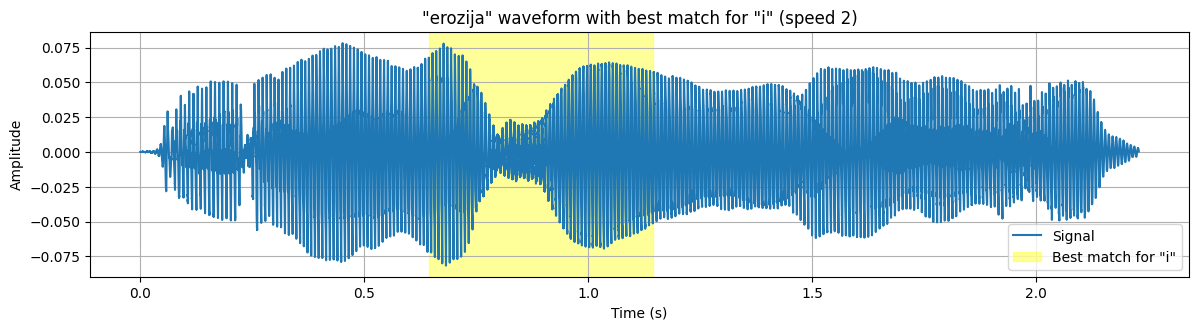

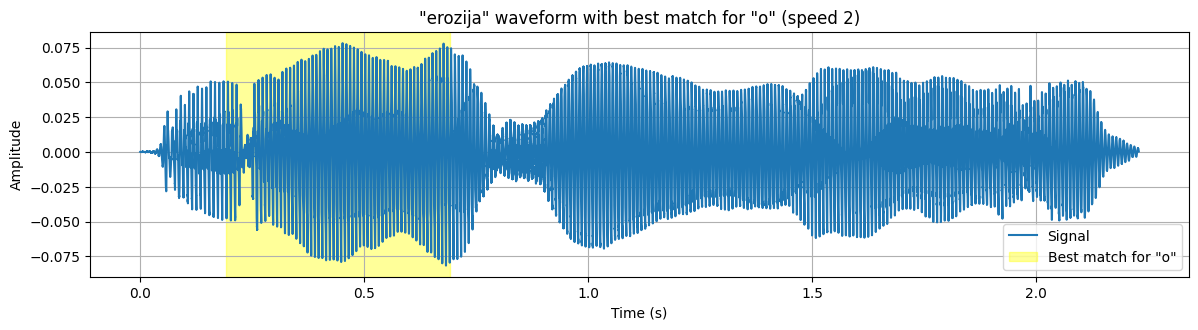

In [478]:


# Define vowels to detect
vowels_to_find = ['a', 'i', 'o']

templates = {vowel: create_vowel_template(vowel, sample_rate, duration=0.5) for vowel in vowels_to_find}

for speed in ['1', '2']:
    erozija_signal = trimmed_erozija_1 if speed == '1' else trimmed_erozija_2
    time_erozija = np.arange(len(erozija_signal)) / sample_rate

    for vowel in vowels_to_find:
        template = templates[vowel]
        start_time, end_time, score, correlation = find_best_match_segment(erozija_signal, template, sample_rate)
        corr_time = np.arange(len(correlation)) / sample_rate

        plt.figure(figsize=(12, 6))

        # Plot the signal with best match highlighted
        plt.subplot(2, 1, 1)
        plt.plot(time_erozija, erozija_signal, label='Signal')
        plt.axvspan(start_time, end_time, color='yellow', alpha=0.4, label=f'Best match for "{vowel}"')
        plt.title(f'"erozija" waveform with best match for "{vowel}" (speed {speed})')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


## Zaključek

- Signal samoglasnikov v besedi "erozija" je podoben samostojnim izgovorjavam, vendar je spremenjen zaradi povezovanja med glasovi.
- Križna korelacija omogoča določitev približnega začetka črke v signalu.
- Žvižg ima pretežno sinusno obliko, značilno za čiste tone.